# Imports: 

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.geocoders import Nominatim
import folium
import random

# University Datasets/Initial analysis:

In [146]:
ws_538 = pd.read_csv("women-stem.csv")
ws_538

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
...,...,...,...,...,...,...,...,...,...
71,72,3604,ECOLOGY,Biology & Life Science,9154,3878,5276,0.576360,33000
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.721866,33000
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.774577,32400
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.967998,28000


In [106]:
uiuc_2014 = pd.read_csv("uiuc2014F.csv")
uiuc_2014

,Major,Profession,Total per profession,Men,Women,Unknown
0,"Agr, Cons, Env Sci",Graduate,582,282,300,0
1,"Agr, Cons, Env Sci",Undergraduate,2734,1239,1495,0
2,Business,Graduate,1141,620,521,0
3,Business,Undergraduate,3050,1664,1386,0
4,Education,Graduate,563,171,392,0
5,Education,Undergraduate,569,46,523,0
6,Engineering,Graduate,3097,2411,686,0
7,Engineering,Undergraduate,7324,6049,1274,1
8,Fine & Applied Arts,Graduate,791,376,415,0
9,Fine & Applied Arts,Undergraduate,1499,662,837,0


In [107]:
uiuc_2023 = pd.read_csv("uiuc2023F.csv")
uiuc_2023

,Major,Profession,Total per profession,Men,Women,Unknown
0,"Agr, Cons, Env Sci",Graduate,755,279,474,2
1,"Agr, Cons, Env Sci",Undergraduate,2674,1178,1496,0
2,Business,Graduate,5790,3500,2263,27
3,Business,Undergraduate,3112,1761,1348,3
4,Education,Graduate,1086,330,752,4
5,Education,Undergraduate,728,92,636,0
6,Grainger Engineering,Graduate,5948,4509,1407,32
7,Grainger Engineering,Undergraduate,8659,6540,2116,3
8,Fine & Applied Arts,Graduate,656,282,374,0
9,Fine & Applied Arts,Undergraduate,1834,772,1059,3


### Filtering UIUC datasets

In [108]:
uiuc14 = uiuc_2014.iloc[[0, 1, 6, 7, 15, 16, 18, 19, 20, 21, 27]]
uiuc14

,Major,Profession,Total per profession,Men,Women,Unknown
0,"Agr, Cons, Env Sci",Graduate,582,282,300,0
1,"Agr, Cons, Env Sci",Undergraduate,2734,1239,1495,0
6,Engineering,Graduate,3097,2411,686,0
7,Engineering,Undergraduate,7324,6049,1274,1
15,Liberal Arts & Sci,Graduate,2521,1269,1252,0
16,Liberal Arts & Sci,Undergraduate,11514,6059,5453,2
18,Applied Health Sci,Graduate,274,79,195,0
19,Applied Health Sci,Undergraduate,1980,653,1327,0
20,Veterinary Medicine,Graduate,68,26,42,0
21,Veterinary Medicine,Professional,485,78,406,1


In [109]:
uiuc23 = uiuc_2023.iloc[[0, 1, 6, 7, 15, 16, 18, 19, 20, 21, 27, 28]]
uiuc23

,Major,Profession,Total per profession,Men,Women,Unknown
0,"Agr, Cons, Env Sci",Graduate,755,279,474,2
1,"Agr, Cons, Env Sci",Undergraduate,2674,1178,1496,0
6,Grainger Engineering,Graduate,5948,4509,1407,32
7,Grainger Engineering,Undergraduate,8659,6540,2116,3
15,Liberal Arts & Sci,Graduate,2610,1337,1268,5
16,Liberal Arts & Sci,Undergraduate,12297,5740,6545,12
18,Applied Health Sci,Graduate,361,129,231,1
19,Applied Health Sci,Undergraduate,2222,780,1440,2
20,Veterinary Medicine,Graduate,189,67,122,0
21,Veterinary Medicine,Professional,608,91,515,2


In [110]:
ws_538 = pd.read_csv("women-stem.csv")
ws_538 = ws_538.dropna()
#ws_538
ws_538['ShareWomen'] = round(ws_538['ShareWomen'],2)
ws_538

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.12,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.10,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.15,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.11,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.14,65000
...,...,...,...,...,...,...,...,...,...
71,72,3604,ECOLOGY,Biology & Life Science,9154,3878,5276,0.58,33000
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.72,33000
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.77,32400
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.97,28000


## Initial Analysis

In [111]:
uiuc14['percent_women_14'] = round(uiuc14['Women']/ uiuc14['Total per profession'], 2)
uiuc14

C:\Users\Trish\AppData\Local\Temp\ipykernel_85500\3555529864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uiuc14['percent_women_14'] = round(uiuc14['Women']/ uiuc14['Total per profession'], 2)


,Major,Profession,Total per profession,Men,Women,Unknown,percent_women_14
0,"Agr, Cons, Env Sci",Graduate,582,282,300,0,0.52
1,"Agr, Cons, Env Sci",Undergraduate,2734,1239,1495,0,0.55
6,Engineering,Graduate,3097,2411,686,0,0.22
7,Engineering,Undergraduate,7324,6049,1274,1,0.17
15,Liberal Arts & Sci,Graduate,2521,1269,1252,0,0.50
16,Liberal Arts & Sci,Undergraduate,11514,6059,5453,2,0.47
18,Applied Health Sci,Graduate,274,79,195,0,0.71
19,Applied Health Sci,Undergraduate,1980,653,1327,0,0.67
20,Veterinary Medicine,Graduate,68,26,42,0,0.62
21,Veterinary Medicine,Professional,485,78,406,1,0.84


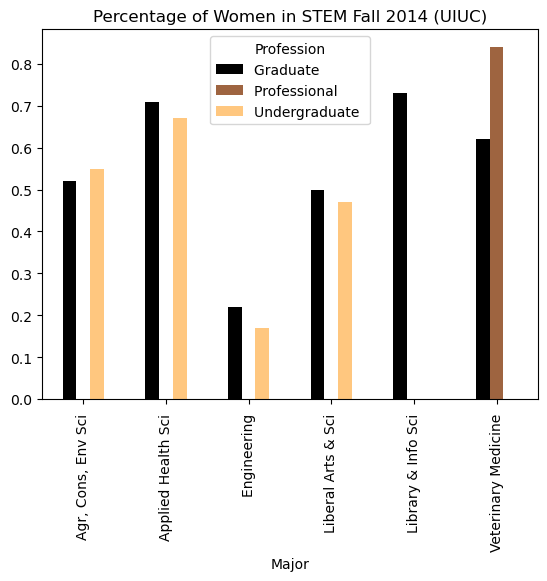

In [112]:
df = pd.pivot_table(uiuc14, index = 'Major', columns = 'Profession', values = 'percent_women_14')
df.plot(kind='bar', colormap = 'copper', title = 'Percentage of Women in STEM Fall 2014 (UIUC)')
plt.show()

In [113]:
uiuc23['percent_women_23'] = round(uiuc23['Women']/ uiuc23['Total per profession'], 2)
uiuc23

C:\Users\Trish\AppData\Local\Temp\ipykernel_85500\2937882570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uiuc23['percent_women_23'] = round(uiuc23['Women']/ uiuc23['Total per profession'], 2)


,Major,Profession,Total per profession,Men,Women,Unknown,percent_women_23
0,"Agr, Cons, Env Sci",Graduate,755,279,474,2,0.63
1,"Agr, Cons, Env Sci",Undergraduate,2674,1178,1496,0,0.56
6,Grainger Engineering,Graduate,5948,4509,1407,32,0.24
7,Grainger Engineering,Undergraduate,8659,6540,2116,3,0.24
15,Liberal Arts & Sci,Graduate,2610,1337,1268,5,0.49
16,Liberal Arts & Sci,Undergraduate,12297,5740,6545,12,0.53
18,Applied Health Sci,Graduate,361,129,231,1,0.64
19,Applied Health Sci,Undergraduate,2222,780,1440,2,0.65
20,Veterinary Medicine,Graduate,189,67,122,0,0.65
21,Veterinary Medicine,Professional,608,91,515,2,0.85


<Axes: title={'center': 'Percentage of Women in STEM Fall 2023 (UIUC)'}, xlabel='Major'>

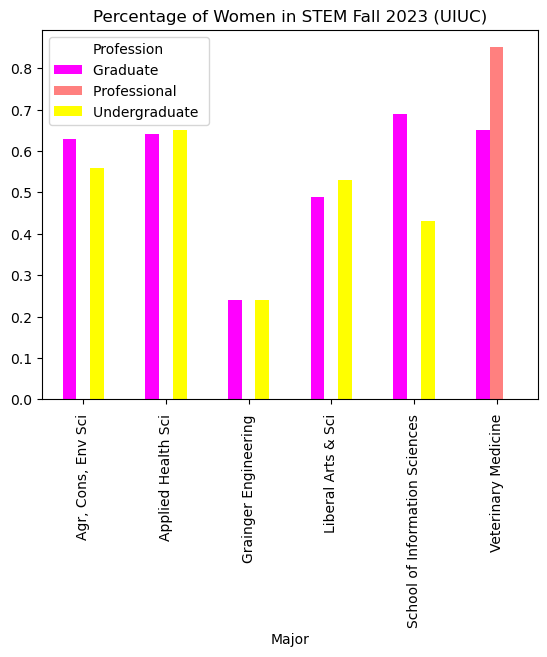

In [114]:
df2 = pd.pivot_table(uiuc23, index = 'Major', columns = 'Profession', values = 'percent_women_23')
df2.plot(kind='bar', colormap = 'spring', title = 'Percentage of Women in STEM Fall 2023 (UIUC)')

In [115]:
data={'Majors': uiuc23['Major'], 'Profession': uiuc23['Profession'],'F14':uiuc14['percent_women_14'],'F23':uiuc23['percent_women_23']}
uiuc = pd.DataFrame(data)
uiuc = uiuc.fillna(0)
uiuc.groupby(['Majors', 'Profession'])
uiuc['difference'] = uiuc["F23"] - uiuc["F14"]
uiuc

,Majors,Profession,F14,F23,difference
0,"Agr, Cons, Env Sci",Graduate,0.52,0.63,0.11
1,"Agr, Cons, Env Sci",Undergraduate,0.55,0.56,0.01
6,Grainger Engineering,Graduate,0.22,0.24,0.02
7,Grainger Engineering,Undergraduate,0.17,0.24,0.07
15,Liberal Arts & Sci,Graduate,0.50,0.49,-0.01
16,Liberal Arts & Sci,Undergraduate,0.47,0.53,0.06
18,Applied Health Sci,Graduate,0.71,0.64,-0.07
19,Applied Health Sci,Undergraduate,0.67,0.65,-0.02
20,Veterinary Medicine,Graduate,0.62,0.65,0.03
21,Veterinary Medicine,Professional,0.84,0.85,0.01


<Axes: title={'center': 'Difference of Percentage of Women in STEM Fall 2023 compared to Fall 2014 (UIUC)'}, xlabel='Majors'>

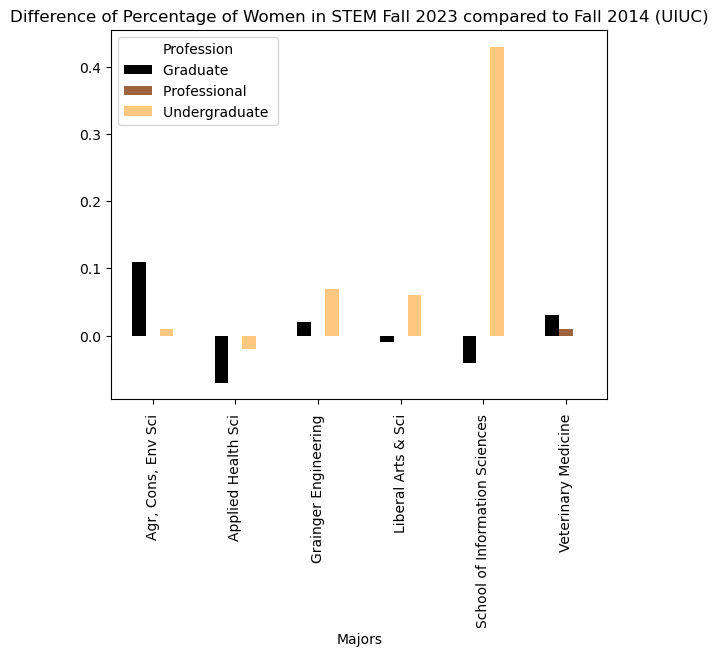

In [116]:
df3 = pd.pivot_table(uiuc, index = 'Majors', columns = 'Profession', values = 'difference')
df3.plot(kind='bar', colormap = 'copper', title = 'Difference of Percentage of Women in STEM Fall 2023 compared to Fall 2014 (UIUC)')

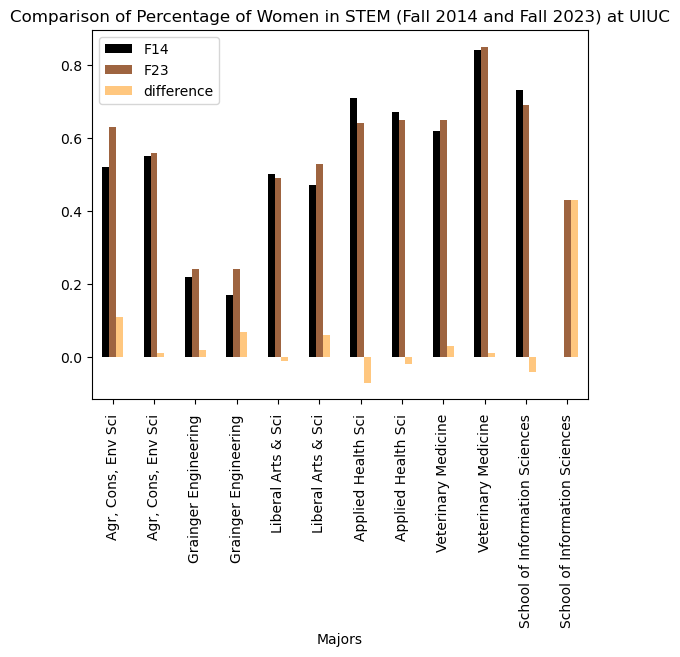

In [117]:
uiuc.plot(kind='bar', colormap = 'copper', title = 'Comparison of Percentage of Women in STEM (Fall 2014 and Fall 2023) at UIUC', x = 'Majors')
plt.show()

C:\Users\Trish\AppData\Local\Temp\ipykernel_85500\3004669525.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fivethree = ws_538.groupby('Major_category').agg('mean').reset_index()


<Axes: title={'center': 'Average Percentage of Women in each Major Category According to FiveThreeEight'}, xlabel='Major categories', ylabel='Percentage'>

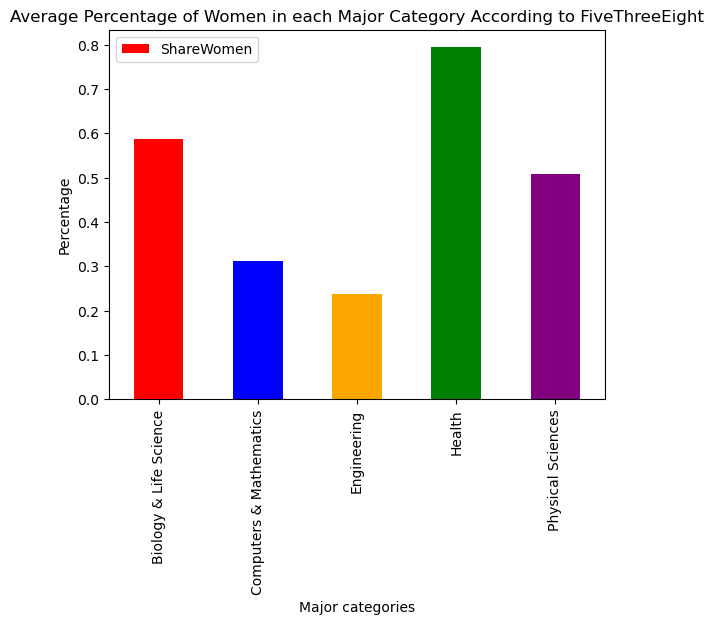

In [118]:
fivethree = ws_538.groupby('Major_category').agg('mean').reset_index()
five = fivethree[['Major_category', 'ShareWomen']]
five.plot(x="Major_category", xlabel = 'Major categories', y='ShareWomen', ylabel = 'Percentage', kind="bar", color = ['red', 'blue', 'orange', 'green', 'purple'], title = 'Average Percentage of Women in each Major Category According to FiveThreeEight')

In [119]:
fivethree = ws_538.groupby('Major_category').agg('mean').reset_index()
five = fivethree[['Major_category', 'ShareWomen']]
five

C:\Users\Trish\AppData\Local\Temp\ipykernel_85500\3765612223.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fivethree = ws_538.groupby('Major_category').agg('mean').reset_index()


,Major_category,ShareWomen
0,Biology & Life Science,0.587857
1,Computers & Mathematics,0.311818
2,Engineering,0.238276
3,Health,0.794167
4,Physical Sciences,0.509000


# Contiuation of Analysis

## National Datasets

In [120]:
# Source: https://economicengine.utdallas.edu/analysis/stemwomen/
utd_2019 = pd.read_csv('wos_2019.csv', encoding='unicode_escape')
utd_2019 = utd_2019.dropna()
utd_2019 = utd_2019[utd_2019["Group"] == "All STEM"]
utd_2019

,MSA.Code,City,Median Earnings: Men,Median Earnings: Women,Employment: Men,Employment: Women,Employment: Total,Earnings Difference (Women vs. Men),Earnings Percentage (Women vs. Men),Employment Difference (Women vs. Men),Employment Percentage (Women vs. Total),Group
1,10100,"Aberdeen, SD",62750.0,40000.0,393.0,168.0,561.0,22750.0,0.64,225.0,0.30,All STEM
6,10140,"Aberdeen, WA",65417.0,45875.0,578.0,309.0,887.0,19542.0,0.70,269.0,0.35,All STEM
11,10180,"Abilene, TX",60685.0,50781.0,1602.0,399.0,2001.0,9904.0,0.84,1203.0,0.20,All STEM
16,10220,"Ada, OK",68417.0,55781.0,363.0,82.0,445.0,12636.0,0.82,281.0,0.18,All STEM
21,10300,"Adrian, MI",76373.0,56875.0,1293.0,259.0,1552.0,19498.0,0.74,1034.0,0.17,All STEM
...,...,...,...,...,...,...,...,...,...,...,...,...
4666,49620,"York-Hanover, PA",78674.0,64340.0,8329.0,2394.0,10723.0,14334.0,0.82,5935.0,0.22,All STEM
4671,49660,"Youngstown-Warren-Boardman, OH-PA",72488.0,50208.0,4814.0,1166.0,5980.0,22280.0,0.69,3648.0,0.19,All STEM
4676,49700,"Yuba City, CA",72587.0,63721.0,1731.0,562.0,2293.0,8866.0,0.88,1169.0,0.25,All STEM
4681,49740,"Yuma, AZ",65977.0,52011.0,1722.0,453.0,2175.0,13966.0,0.79,1269.0,0.21,All STEM


In [121]:
# Source: https://nces.ed.gov/programs/digest/d22/tables/dt22_318.45.asp (National center for Education Staitics)
table_318 = pd.read_csv("Number of STEM certificates conferred to U.S. citizens, permanent residents, and nonresidents.csv")
table_318 = table_318.loc[:, ~table_318.columns.str.contains('^Unnamed')]
table_318 = table_318.dropna()
table_318

,Year,Associates Total,Associates Men,Associates Women,Bachelors Total,Bachelors Men,Bachelors Women,Masters Total,Masters Men,Masters Women,Doctorate Total,Doctorate Men,Doctorate Women
0,2011,92464.0,73348.0,19116.0,286788.0,185802.0,100986.0,91612.0,63212.0,28400.0,25528.0,16685.0,8843.0
1,2012,88800.0,69944.0,18856.0,302340.0,196343.0,105997.0,95375.0,65369.0,30006.0,26577.0,17412.0,9165.0
2,2013,87366.0,68671.0,18695.0,318612.0,206935.0,111677.0,100078.0,67904.0,32174.0,28070.0,18468.0,9602.0
3,2014,88401.0,68932.0,19469.0,335849.0,217832.0,118017.0,112260.0,75544.0,36716.0,28037.0,18393.0,9644.0
4,2015,79869.0,61252.0,18617.0,354794.0,228705.0,126089.0,129142.0,87052.0,42090.0,28238.0,18710.0,9528.0
5,2016,82334.0,62671.0,19663.0,376869.0,242286.0,134583.0,139282.0,93746.0,45536.0,28544.0,18892.0,9652.0
6,2017,85271.0,64347.0,20924.0,395235.0,252738.0,142497.0,140255.0,92504.0,47751.0,29455.0,19261.0,10194.0
7,2018,86833.0,64410.0,22423.0,412962.0,262925.0,150037.0,138192.0,90099.0,48093.0,29854.0,19689.0,10165.0
8,2019,85231.0,62435.0,22796.0,429352.0,268950.0,160402.0,142799.0,91662.0,51137.0,29591.0,19414.0,10177.0
9,2020,87382.0,62103.0,25279.0,437302.0,270160.0,167142.0,146573.0,92965.0,53608.0,28818.0,18723.0,10095.0


In [122]:
table_318['Total Men'] = table_318["Associates Men"]+table_318['Bachelors Men']+table_318["Masters Men"]+table_318["Doctorate Men"]
table_318['Total Women'] = table_318["Associates Women"]+table_318['Bachelors Women']+table_318["Masters Women"]+table_318["Doctorate Women"]
table_318['Total Difference'] = table_318['Total Men'] - table_318['Total Women']
table_318

,Year,Associates Total,Associates Men,Associates Women,Bachelors Total,Bachelors Men,Bachelors Women,Masters Total,Masters Men,Masters Women,Doctorate Total,Doctorate Men,Doctorate Women,Total Men,Total Women,Total Difference
0,2011,92464.0,73348.0,19116.0,286788.0,185802.0,100986.0,91612.0,63212.0,28400.0,25528.0,16685.0,8843.0,339047.0,157345.0,181702.0
1,2012,88800.0,69944.0,18856.0,302340.0,196343.0,105997.0,95375.0,65369.0,30006.0,26577.0,17412.0,9165.0,349068.0,164024.0,185044.0
2,2013,87366.0,68671.0,18695.0,318612.0,206935.0,111677.0,100078.0,67904.0,32174.0,28070.0,18468.0,9602.0,361978.0,172148.0,189830.0
3,2014,88401.0,68932.0,19469.0,335849.0,217832.0,118017.0,112260.0,75544.0,36716.0,28037.0,18393.0,9644.0,380701.0,183846.0,196855.0
4,2015,79869.0,61252.0,18617.0,354794.0,228705.0,126089.0,129142.0,87052.0,42090.0,28238.0,18710.0,9528.0,395719.0,196324.0,199395.0
5,2016,82334.0,62671.0,19663.0,376869.0,242286.0,134583.0,139282.0,93746.0,45536.0,28544.0,18892.0,9652.0,417595.0,209434.0,208161.0
6,2017,85271.0,64347.0,20924.0,395235.0,252738.0,142497.0,140255.0,92504.0,47751.0,29455.0,19261.0,10194.0,428850.0,221366.0,207484.0
7,2018,86833.0,64410.0,22423.0,412962.0,262925.0,150037.0,138192.0,90099.0,48093.0,29854.0,19689.0,10165.0,437123.0,230718.0,206405.0
8,2019,85231.0,62435.0,22796.0,429352.0,268950.0,160402.0,142799.0,91662.0,51137.0,29591.0,19414.0,10177.0,442461.0,244512.0,197949.0
9,2020,87382.0,62103.0,25279.0,437302.0,270160.0,167142.0,146573.0,92965.0,53608.0,28818.0,18723.0,10095.0,443951.0,256124.0,187827.0


In [125]:
utd_2019['City'] = utd_2019['City'].astype(str)
utd_2019

,MSA.Code,City,Median Earnings: Men,Median Earnings: Women,Employment: Men,Employment: Women,Employment: Total,Earnings Difference (Women vs. Men),Earnings Percentage (Women vs. Men),Employment Difference (Women vs. Men),Employment Percentage (Women vs. Total),Group
1,10100,"Aberdeen, SD",62750.0,40000.0,393.0,168.0,561.0,22750.0,0.64,225.0,0.30,All STEM
6,10140,"Aberdeen, WA",65417.0,45875.0,578.0,309.0,887.0,19542.0,0.70,269.0,0.35,All STEM
11,10180,"Abilene, TX",60685.0,50781.0,1602.0,399.0,2001.0,9904.0,0.84,1203.0,0.20,All STEM
16,10220,"Ada, OK",68417.0,55781.0,363.0,82.0,445.0,12636.0,0.82,281.0,0.18,All STEM
21,10300,"Adrian, MI",76373.0,56875.0,1293.0,259.0,1552.0,19498.0,0.74,1034.0,0.17,All STEM
...,...,...,...,...,...,...,...,...,...,...,...,...
4666,49620,"York-Hanover, PA",78674.0,64340.0,8329.0,2394.0,10723.0,14334.0,0.82,5935.0,0.22,All STEM
4671,49660,"Youngstown-Warren-Boardman, OH-PA",72488.0,50208.0,4814.0,1166.0,5980.0,22280.0,0.69,3648.0,0.19,All STEM
4676,49700,"Yuba City, CA",72587.0,63721.0,1731.0,562.0,2293.0,8866.0,0.88,1169.0,0.25,All STEM
4681,49740,"Yuma, AZ",65977.0,52011.0,1722.0,453.0,2175.0,13966.0,0.79,1269.0,0.21,All STEM


In [126]:
cities = pd.read_csv("city_loc.csv")
cities = pd.merge(cities, utd_2019, on=['City'], how='inner')
cities = cities.dropna()
cities['Employment Ratio (Women:Men)'] = round(cities['Employment: Women']/cities['Employment: Men'], 2)

## Analysis: 

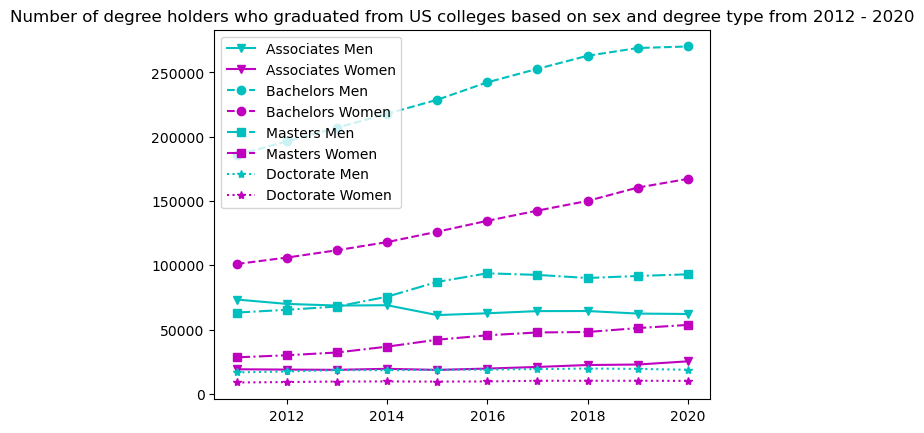

In [124]:
plt.plot(table_318['Year'], table_318['Associates Men'], color = 'c', marker = 'v', label='Associates Men')
plt.plot(table_318['Year'], table_318['Associates Women'], color = 'm',marker = 'v', label='Associates Women')
plt.plot(table_318['Year'], table_318['Bachelors Men'], '--', color = 'c', marker = 'o',label='Bachelors Men')
plt.plot(table_318['Year'], table_318['Bachelors Women'], '--',color = 'm', marker = 'o',label='Bachelors Women')
plt.plot(table_318['Year'], table_318['Masters Men'], '-.',color = 'c', marker = 's',label='Masters Men')
plt.plot(table_318['Year'], table_318['Masters Women'], '-.', color = 'm', marker = 's',label='Masters Women')
plt.plot(table_318['Year'], table_318['Doctorate Men'],':',color = 'c', marker = '*',label='Doctorate Men')
plt.plot(table_318['Year'], table_318['Doctorate Women'], ':',color = 'm', marker = '*',label='Doctorate Women')
plt.legend()
plt.title("Number of degree holders who graduated from US colleges based on sex and degree type from 2012 - 2020")
plt.show()

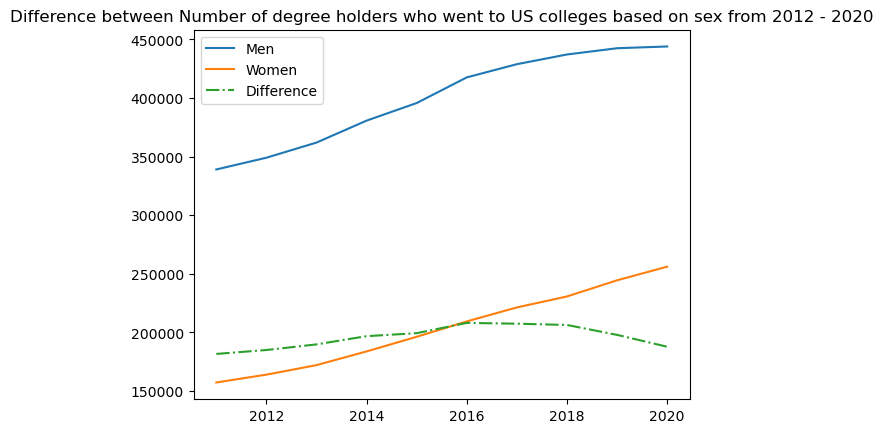

In [123]:
#y = [table_318['Total Men'], table_318['Total Women']]

plt.plot(table_318['Year'], table_318['Total Men'], label='Men')
plt.plot(table_318['Year'], table_318['Total Women'], label='Women')
plt.plot(table_318['Year'], table_318['Total Difference'], '-.', label='Difference')
plt.legend()
plt.title("Difference between Number of degree holders who went to US colleges based on sex from 2012 - 2020")
plt.show()

In [127]:
geolocator = Nominatim(user_agent="Wenyi Shang's mapping app", timeout=2)
geolocator

In [128]:
Usa = geolocator.geocode("Unite States of America")

### Original Version of Spatial Analysis

In [145]:
USA_map = folium.Map(location=[Usa.raw['lat'], Usa.raw['lon']], zoom_start=6)
for i in range(len(cities)):
    folium.Circle(location = (cities['lat'][i], cities['lng'][i]),
                  color = 'green',
                  radius = cities['Earnings Percentage (Women vs. Men)'][i]*25000).add_to(USA_map)
for i in range(len(cities)):
    folium.Circle(location = (cities['lat'][i], cities['lng'][i]),
                  color = 'black',
                  radius = cities['Employment Ratio (Women:Men)'][i]*25000,
                  tooltip = (cities['City'][i],
                             cities['Earnings Percentage (Women vs. Men)'][i],
                             cities['Employment Ratio (Women:Men)'][i])).add_to(USA_map)
USA_map

### Modified Version of Spatial Analysis

In [139]:
ep = cities.sort_values(by='Earnings Percentage (Women vs. Men)', ascending = False)
ndf1 = cities.iloc[[496, 352, 347,651, 21, 446, 432, 530, 29,556],:]
ndf1 = ndf1.reset_index()
ndf2 = cities.iloc[[473,365,120,552,605,319,532,306,107,52],:]
ndf2 = ndf2.reset_index()

USA_Earnings_Percentage = folium.Map(location=[Usa.raw['lat'], Usa.raw['lon']], zoom_start=6)

#highest
for i in range(10):
    folium.Circle(location = (ndf1['lat'][i], ndf1['lng'][i]),
                  color = 'red',
                  radius = ndf1['Earnings Percentage (Women vs. Men)'][i]*50000,
                  tooltip = (ndf1['City'][i],
                            ndf1['Earnings Percentage (Women vs. Men)'][i])).add_to(USA_Earnings_Percentage)
#lowest
for i in range(10):
    folium.Circle(location = (ndf2['lat'][i], ndf2['lng'][i]),
                  color = 'orange',
                  radius = ndf2['Earnings Percentage (Women vs. Men)'][i]*50000,
                  tooltip = (ndf2['City'][i],
                             ndf2['Earnings Percentage (Women vs. Men)'][i])).add_to(USA_Earnings_Percentage)
USA_Earnings_Percentage

In [144]:
# different ratio for radius was used to see data better

er = cities.sort_values(by='Employment Ratio (Women:Men)', ascending = False)
er_h = er.head(10)
er_t = er.tail(10)
df1 = cities.iloc[[75,146,269,307,105,532,340,290,625,44],:]
df1 = df1.reset_index()
df2 = cities.iloc[[273,566,56,103,194,167,418,136,21,358],:]
df2 = df2.reset_index()

USA_Employment_Ratio = folium.Map(location=[Usa.raw['lat'], Usa.raw['lon']], zoom_start=6)

#highest
for i in range(10):
    folium.Circle(location = (df1['lat'][i], df1['lng'][i]),
                  color = 'blue',
                  radius = df1['Employment Ratio (Women:Men)'][i]*100000,
                  tooltip = (df1['City'][i],
                             df1['Employment Ratio (Women:Men)'][i])).add_to(USA_Employment_Ratio)
#lowest
for i in range(10):
    folium.Circle(location = (df2['lat'][i], df2['lng'][i]),
                  color = 'teal',
                  radius = df2['Employment Ratio (Women:Men)'][i]*100000,
                  tooltip = (df2['City'][i],
                             df2['Employment Ratio (Women:Men)'][i])).add_to(USA_Employment_Ratio)
USA_Employment_Ratio